# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as p
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={weather_api_key}"
#url = f"http://api.openweathermap.org/geo/1.0/direct?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    #if (i > 5): break

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #p.pprint(city_weather) # debug

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['city']['coord']['lat']
        #print(city_lat)
        city_lng = city_weather['city']['coord']['lon']
        #print(city_lng)
        city_max_temp = city_weather['list'][0]['main']['temp_max']
        #print(city_max_temp)
        city_humidity = city_weather['list'][0]['main']['humidity']
        #print(city_humidity)
        city_clouds = city_weather['list'][0]['clouds']['all']
        #print(city_clouds)
        city_wind = city_weather['list'][0]['wind']['speed']
        #print(city_wind)
        city_country = city_weather['city']['country']
        #print(city_country)
        city_date = city_weather['list'][0]['dt_txt']
        #print(city_date)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        #p.pprint(city_data)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | revda
Processing Record 3 of Set 1 | gonzaga
Processing Record 4 of Set 1 | utrik
Processing Record 5 of Set 1 | wenchang
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | kaa-khem
Processing Record 9 of Set 1 | coquimbo
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | ola
Processing Record 14 of Set 1 | iskateley
Processing Record 15 of Set 1 | lorengau
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | richards bay
Processing Record 18 of Set 1 | pitiquito
Processing Record 19 of Set 1 | lospalos
Processing Record 20 of Set 1 | cartagena
Processing Record 21 of Set 1 | prado
Processing Record 22 of Set 1 | coahuayana de hidalgo
Processing Record 23 of Set

Processing Record 41 of Set 4 | enewetak
Processing Record 42 of Set 4 | rahim yar khan
City not found. Skipping...
Processing Record 43 of Set 4 | flin flon
Processing Record 44 of Set 4 | san pablo villa de mitla
Processing Record 45 of Set 4 | kiunga
Processing Record 46 of Set 4 | cameron park
Processing Record 47 of Set 4 | chonchi
Processing Record 48 of Set 4 | fengkou
Processing Record 49 of Set 4 | haiku-pauwela
Processing Record 0 of Set 5 | derry
Processing Record 1 of Set 5 | tolanaro
Processing Record 2 of Set 5 | mao
Processing Record 3 of Set 5 | sydney mines
Processing Record 4 of Set 5 | bouarfa
Processing Record 5 of Set 5 | tangalle
Processing Record 6 of Set 5 | ust'-kulom
Processing Record 7 of Set 5 | nar'yan-mar
Processing Record 8 of Set 5 | sao gabriel da cachoeira
Processing Record 9 of Set 5 | roswell
Processing Record 10 of Set 5 | kone
Processing Record 11 of Set 5 | sao raimundo nonato
Processing Record 12 of Set 5 | dumfries
Processing Record 13 of Set 5 

Processing Record 33 of Set 8 | surubim
Processing Record 34 of Set 8 | isfahan
Processing Record 35 of Set 8 | torghay
Processing Record 36 of Set 8 | lazaro cardenas
Processing Record 37 of Set 8 | kota bharu
Processing Record 38 of Set 8 | okhotsk
Processing Record 39 of Set 8 | temerluh
Processing Record 40 of Set 8 | winnemucca
Processing Record 41 of Set 8 | cabo san lucas
Processing Record 42 of Set 8 | the pas
Processing Record 43 of Set 8 | tarrafal de sao nicolau
Processing Record 44 of Set 8 | luena
Processing Record 45 of Set 8 | siwa oasis
Processing Record 46 of Set 8 | mount pleasant
Processing Record 47 of Set 8 | luanda
Processing Record 48 of Set 8 | nuuk
Processing Record 49 of Set 8 | vadso
Processing Record 0 of Set 9 | mpophomeni
Processing Record 1 of Set 9 | popondetta
Processing Record 2 of Set 9 | ahau
City not found. Skipping...
Processing Record 3 of Set 9 | urangan
Processing Record 4 of Set 9 | raduzhnyy
Processing Record 5 of Set 9 | ambilobe
Processing R

Processing Record 21 of Set 12 | teofilo otoni
Processing Record 22 of Set 12 | er regueb
Processing Record 23 of Set 12 | sao felix do xingu
Processing Record 24 of Set 12 | mil'kovo
Processing Record 25 of Set 12 | tonj
Processing Record 26 of Set 12 | kalmunai
Processing Record 27 of Set 12 | musoma
Processing Record 28 of Set 12 | port augusta
Processing Record 29 of Set 12 | shangri-la
City not found. Skipping...
Processing Record 30 of Set 12 | ceelbuur
Processing Record 31 of Set 12 | gisborne
Processing Record 32 of Set 12 | klaksvik
Processing Record 33 of Set 12 | mammoth lakes
Processing Record 34 of Set 12 | murzuq
Processing Record 35 of Set 12 | san carlos de bariloche
Processing Record 36 of Set 12 | colonia menno
Processing Record 37 of Set 12 | el-tor
Processing Record 38 of Set 12 | panaba
Processing Record 39 of Set 12 | xai-xai
Processing Record 40 of Set 12 | spring creek
Processing Record 41 of Set 12 | kiuruvesi
Processing Record 42 of Set 12 | bayganin
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,297.86,76,59,2.30,PN,2023-04-19 21:00:00
1,revda,56.8010,59.9303,275.16,65,88,1.53,RU,2023-04-19 21:00:00
2,gonzaga,44.9498,10.8209,286.77,79,18,2.75,IT,2023-04-19 21:00:00
3,utrik,11.2278,169.8474,299.85,78,100,8.63,MH,2023-04-19 21:00:00
4,wenchang,30.9040,118.4887,291.18,95,96,3.75,CN,2023-04-19 21:00:00


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,297.86,76,59,2.30,PN,2023-04-19 21:00:00
1,revda,56.8010,59.9303,275.16,65,88,1.53,RU,2023-04-19 21:00:00
2,gonzaga,44.9498,10.8209,286.77,79,18,2.75,IT,2023-04-19 21:00:00
3,utrik,11.2278,169.8474,299.85,78,100,8.63,MH,2023-04-19 21:00:00
4,wenchang,30.9040,118.4887,291.18,95,96,3.75,CN,2023-04-19 21:00:00


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

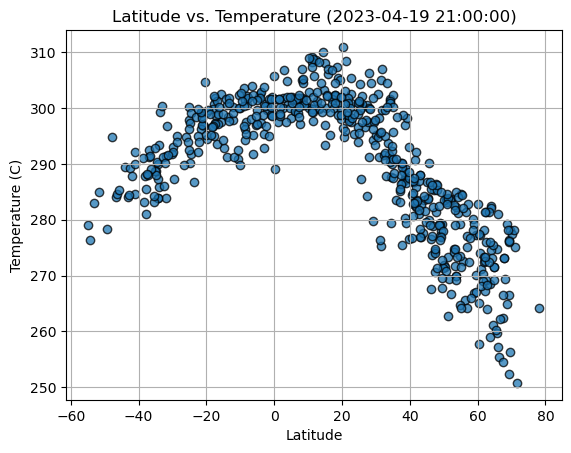

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'Latitude vs. Temperature ({city_data_df["Date"].iloc[0]})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

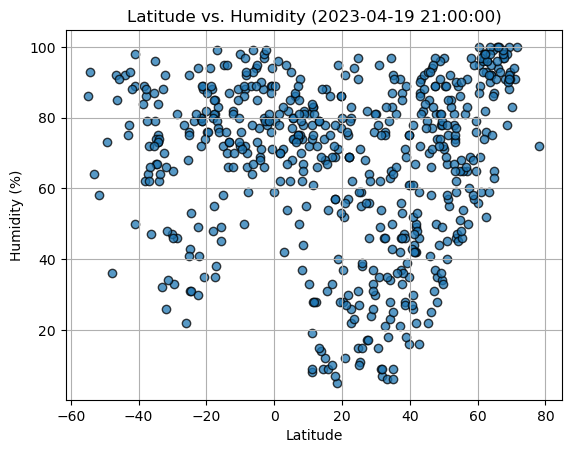

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'Latitude vs. Humidity ({city_data_df["Date"].iloc[0]})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

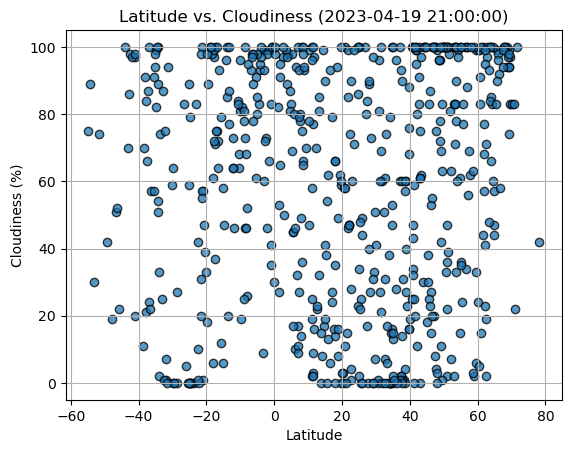

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'Latitude vs. Cloudiness ({city_data_df["Date"].iloc[0]})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

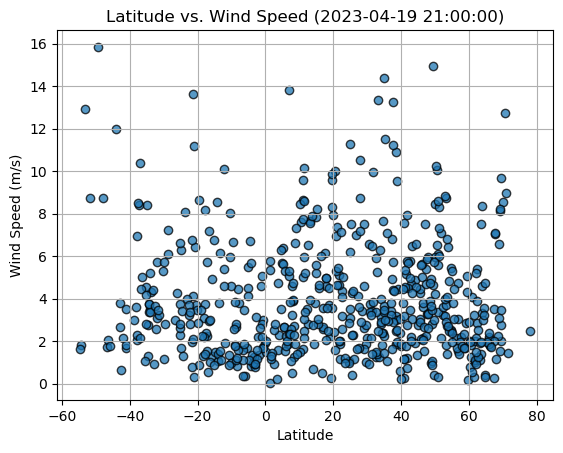

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'Latitude vs. Wind Speed ({city_data_df["Date"].iloc[0]})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


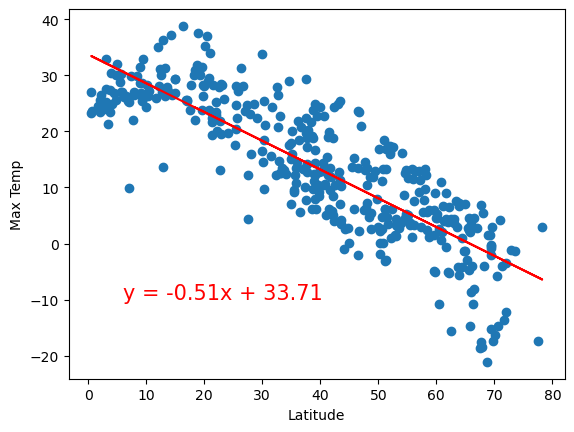

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


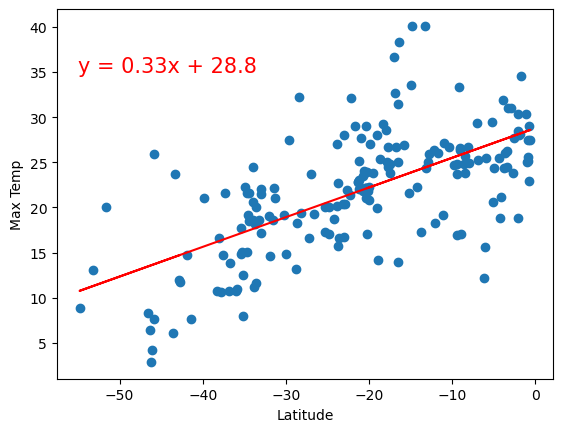

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


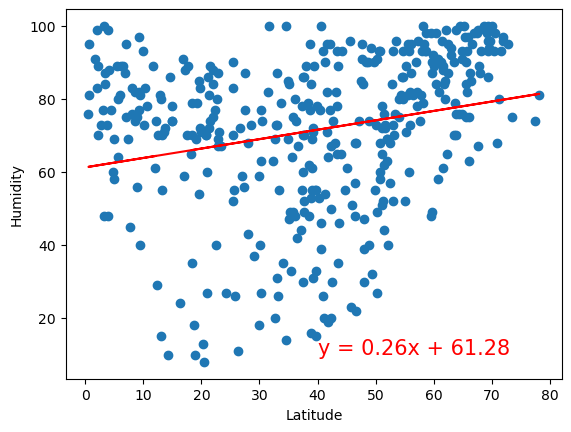

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


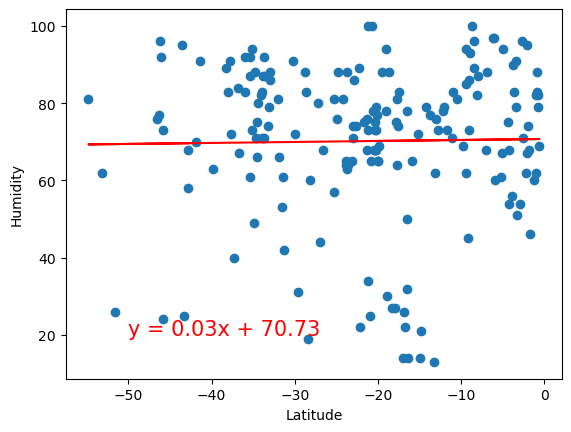

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


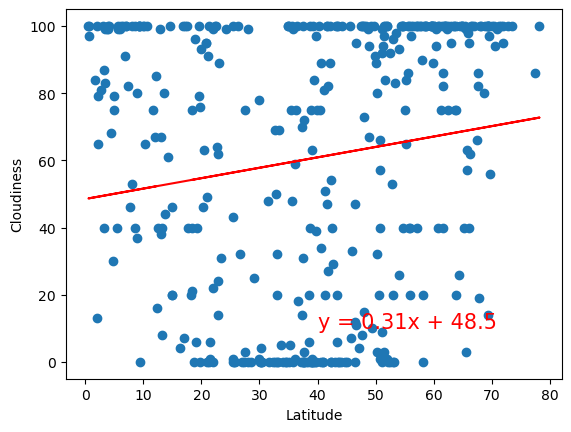

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


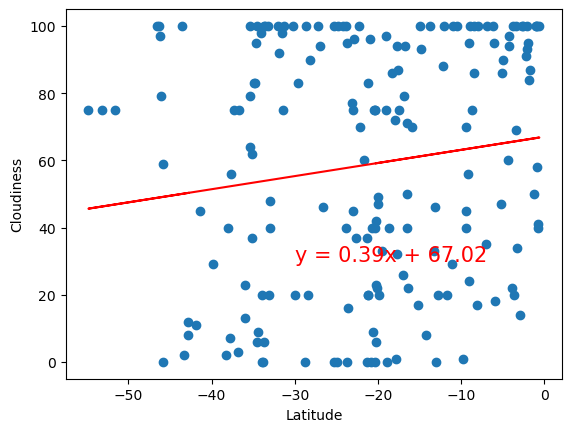

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


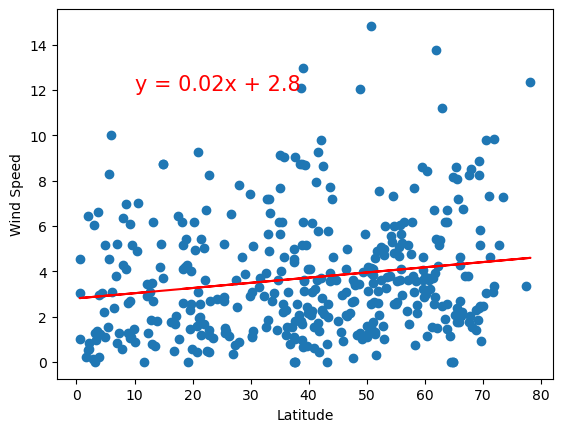

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


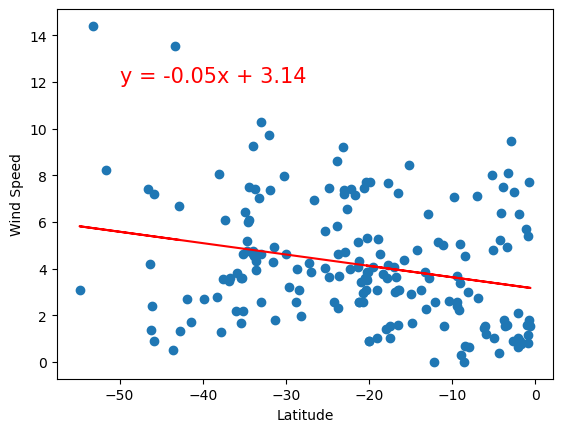

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE